## Modeling: Decision Tree & Random Forests

In [3]:
import os
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pickle

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score


#### Load the Dataframe

In [6]:
with open('all_samples.pkl', 'rb') as f:
    all_samples = pickle.load(f)

In [7]:
all_samples.shape

(734, 233656)

#### Baseline Model

In [4]:
all_samples['is_cancer'].value_counts(normalize=True).round(2)

1    0.87
0    0.13
Name: is_cancer, dtype: float64

#### Set X & y

In [8]:
X = all_samples.drop(columns=['is_cancer'])
y = all_samples['is_cancer']

#### Train-Test-Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### First Model: Decision Tree

In [27]:
tree = DecisionTreeRegressor(random_state=1, max_depth=3)

In [28]:
tree.fit(X_train, y_train)

tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.7125)

In [49]:
# The model os overfitting on the train set, and predicts the test with accuracy of 0.7125 (worse than the baseline model)

##### Creata a diagram of the tree

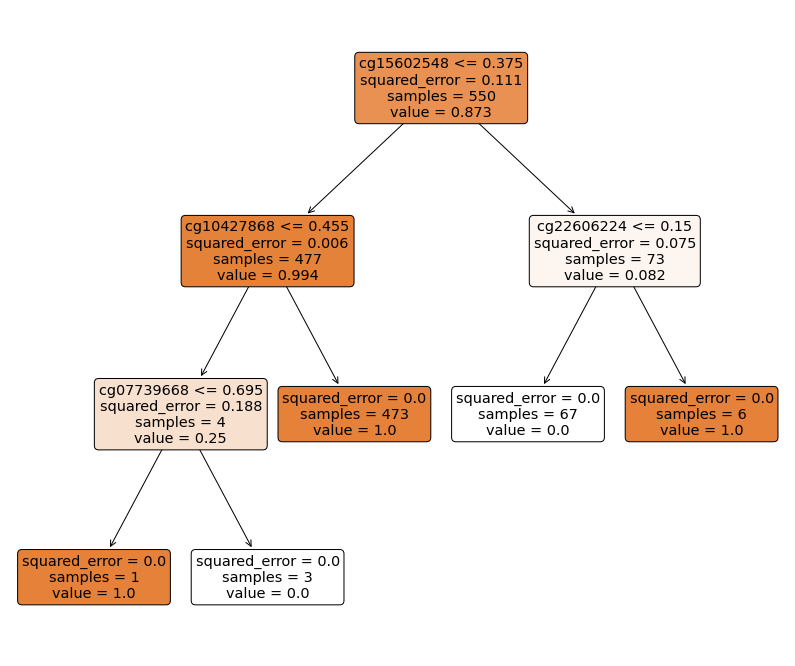

In [9]:
plt.figure(figsize=(14,12))
plot_tree(tree, feature_names=X_train.columns, rounded=True, filled=True);

### Second Model: Random Forests

In [10]:
rf = RandomForestClassifier(n_estimators=100)

In [11]:
et = ExtraTreesClassifier(n_estimators=100)

Check which model has a higher cross validation score:

In [12]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.9854545454545456

In [13]:
cross_val_score(et, X_train, y_train, cv=5).mean()

0.990909090909091

##### Grid Search

In [24]:
rf_params = {                               #consider changing to et, scored better above
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9872727272727273


{'max_depth': 4, 'n_estimators': 100}

In [25]:
gs.score(X_train, y_train)

1.0

In [28]:
%pip install dtreeviz 

  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67327 sha256=b5e62a67b116b4ca7fa143896d081d60be7fa23e5b3bb243a6c41714f7f428cb
  Stored in directory: c:\users\marva\appdata\local\pip\cache\wheels\60\89\05\020fd84deed2402d74d5f97a98c22233156582e19ecf34058f
Successfully built dtreeviz
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [10]:
from dtreeviz.trees import dtreeviz
import graphviz

In [11]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=4,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

In [12]:
viz = dtreeviz(rf.estimators_[99],
               X_train, 
               y_train,
               target_name="Is Cancer",
               feature_names=list(X.columns),
               #class_names=(),
               title="Samples Classification")

viz.view()

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH